In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load CSV Dataset

In [53]:
data = pd.read_csv('datasets/house_price_dataset/train.csv')
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


## Drop Categorical Columns

In [57]:
data.drop(['size_units', 'lot_size_units'], axis=1)

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.00,98144,795000.0
1,4,2.0,2240.0,0.31,98106,915000.0
2,4,3.0,2040.0,3783.00,98107,950000.0
3,4,3.0,3800.0,5175.00,98199,1950000.0
4,2,2.0,1042.0,NaN,98102,950000.0
...,...,...,...,...,...,...
2011,3,2.0,1370.0,0.50,98112,910000.0
2012,1,1.0,889.0,NaN,98121,550000.0
2013,4,2.0,2140.0,6250.00,98199,1150000.0
2014,2,2.0,795.0,NaN,98103,590000.0


In [8]:
data.tail()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
2011,3,2.0,1370.0,sqft,0.5,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.0,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0
2015,3,2.0,1710.0,sqft,4267.0,sqft,98133,659000.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [12]:
data.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [7]:
data.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [13]:
data.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

## EDA(Exploratory Data Analysis)

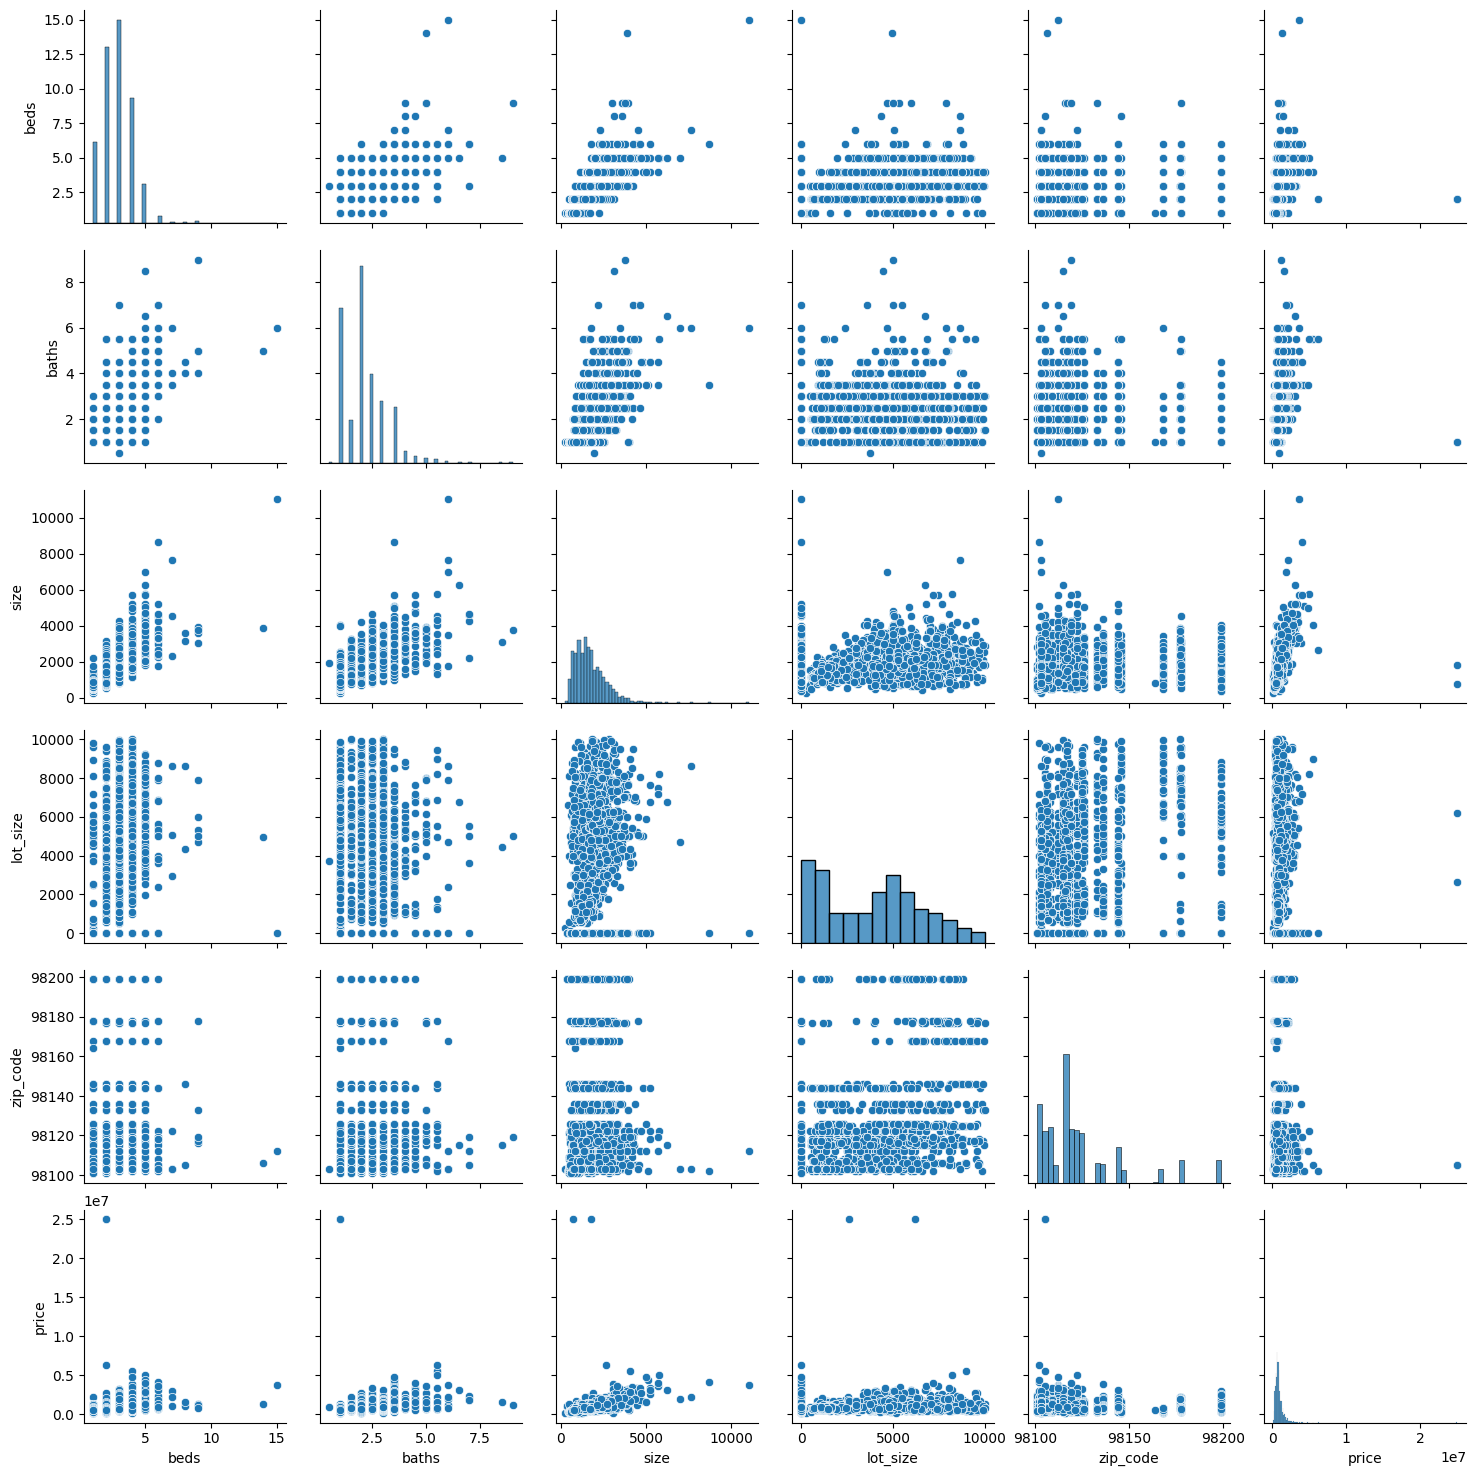

In [15]:
sns.pairplot(data)

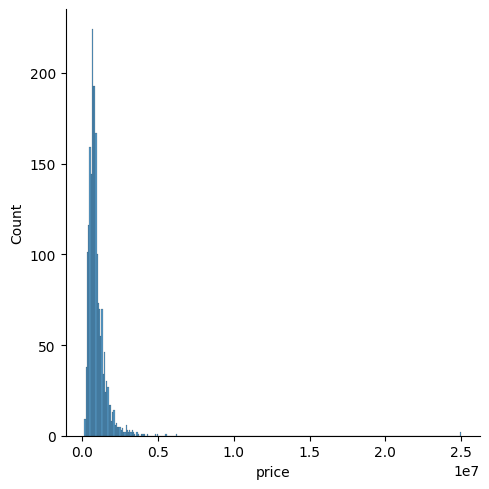

In [18]:
sns.displot(data['price'])

/tmp/ipykernel_33337/1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

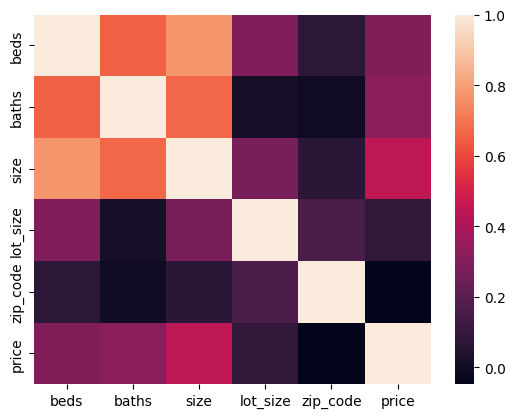

In [19]:
sns.heatmap(data.corr())

In [51]:
y = data['price']
y.head()

0     795000.0
1     915000.0
2     950000.0
3    1950000.0
4     950000.0
Name: price, dtype: float64

In [52]:
X = data.iloc[:, :-1]
X.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code
0,3,2.5,2590.0,sqft,6000.00,sqft,98144
1,4,2.0,2240.0,sqft,0.31,acre,98106
2,4,3.0,2040.0,sqft,3783.00,sqft,98107
3,4,3.0,3800.0,sqft,5175.00,sqft,98199
4,2,2.0,1042.0,sqft,NaN,NaN,98102
